In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
df = pd.read_csv("./data2/ana2_BTS_geoOnly_210212_allday_CDT.csv",index_col='index')
df.head()

,date,hour,language,retweets,min,place,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,
1,2021-02-12,6,en,0,9,[Uzbekistan],Uzbekistan,0,0,0,39,2021-02-12T06:09:39.000-06:00,You are my reason to smile🌌💜\n#JHOPEPlazaClaro...
2,2021-02-12,6,ko,0,11,"[Pyeongtaek-si, Republic of Korea]",South Korea,0,0,0,48,2021-02-12T06:11:48.000-06:00,위로받고 싶을 때 들어보세요 영탁이불\n\n#영탁 #youngtak #영탁이불 #영...
3,2021-02-12,6,en,0,12,[Uzbekistan],Uzbekistan,0,0,0,44,2021-02-12T06:12:44.000-06:00,"When the night is dark, all I can see is your ..."
4,2021-02-12,6,ja,0,20,"[Sapporo-shi Toyohira-ku, Hokkaidō]",Japan,0,0,0,33,2021-02-12T06:20:33.000-06:00,パセオ札幌でBTSのPOPUP SHOPやってんだけど、、今は混んでなくて、ゆっくり店内のグ...
5,2021-02-12,6,en,0,32,[Kazakhstan],Kazakhstan,0,0,0,30,2021-02-12T06:32:30.000-06:00,Hi Engenes!🤗\nPlease watch my #ENHYPEN - #10Mo...


In [3]:
df['place'] = df.place.apply(lambda x: x[1:-1].split(','))
df.place.head()

index
1                            [Uzbekistan]
2     [Pyeongtaek-si,  Republic of Korea]
3                            [Uzbekistan]
4    [Sapporo-shi Toyohira-ku,  Hokkaidō]
5                            [Kazakhstan]
Name: place, dtype: object

In [4]:
city_list = []
country_list = []
for row in df.place: 
    city_list.append(row[:-1])
    country_list.append(row[-1])
print('cities:\n',city_list,'\n')
print('countries:\n',country_list)

cities:
 [[], ['Pyeongtaek-si'], [], ['Sapporo-shi Toyohira-ku'], [], [], ['Changwon-si'], ['Dacca'], ['Changwon-si'], [], ['Changwon-si'], ['Saraikela Kharsawan'], ['Changwon-si'], ['Changwon-si'], ['Meknes'], ['Milan'], ['Punggelan'], ['Kortrijk'], ['Kortrijk'], ['Potsdam'], ['Potsdam'], ['Potsdam'], ['Arjawinangun'], ['Santa Fé'], ['Neuquén'], ['Ivry-sur-Seine'], ['Vicenza'], ['Saidapet'], ['Kita-ku'], ['Detroit'], ['Changwon-si'], ['Changwon-si'], ['North El Monte'], ['Changwon-si'], ['Duque de Caxias'], ['Duque de Caxias'], ['Duque de Caxias'], [], ['Campos dos Goytacazes'], ['Jersey City'], ['Tula de Allende'], ['Guarulhos'], ['Virginia'], ['Florianópolis'], ['Portland'], ['Sao Paulo'], ['Arnavutköy'], ['Columbus'], [], ['Padua'], ['Miami Beach'], ['Bisceglie'], ['Rancho Cucamonga'], ['Bogotá', ' D.C.'], ['Vitória'], ['Quito'], ['South Carolina'], ['Bogotá', ' D.C.'], ['Quito'], ['Los Angeles']] 

countries:
 ['Uzbekistan', ' Republic of Korea', 'Uzbekistan', ' Hokkaidō', 'Kazakh

In [5]:
df.insert(6, "place_1", city_list, True)
df.head()

,date,hour,language,retweets,min,place,place_1,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,,
1,2021-02-12,6,en,0,9,[Uzbekistan],[],Uzbekistan,0,0,0,39,2021-02-12T06:09:39.000-06:00,You are my reason to smile🌌💜\n#JHOPEPlazaClaro...
2,2021-02-12,6,ko,0,11,"[Pyeongtaek-si, Republic of Korea]",[Pyeongtaek-si],South Korea,0,0,0,48,2021-02-12T06:11:48.000-06:00,위로받고 싶을 때 들어보세요 영탁이불\n\n#영탁 #youngtak #영탁이불 #영...
3,2021-02-12,6,en,0,12,[Uzbekistan],[],Uzbekistan,0,0,0,44,2021-02-12T06:12:44.000-06:00,"When the night is dark, all I can see is your ..."
4,2021-02-12,6,ja,0,20,"[Sapporo-shi Toyohira-ku, Hokkaidō]",[Sapporo-shi Toyohira-ku],Japan,0,0,0,33,2021-02-12T06:20:33.000-06:00,パセオ札幌でBTSのPOPUP SHOPやってんだけど、、今は混んでなくて、ゆっくり店内のグ...
5,2021-02-12,6,en,0,32,[Kazakhstan],[],Kazakhstan,0,0,0,30,2021-02-12T06:32:30.000-06:00,Hi Engenes!🤗\nPlease watch my #ENHYPEN - #10Mo...


In [6]:
df.insert(7, "place_2", country_list, True)
df.head()

,date,hour,language,retweets,min,place,place_1,place_2,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,,,
1,2021-02-12,6,en,0,9,[Uzbekistan],[],Uzbekistan,Uzbekistan,0,0,0,39,2021-02-12T06:09:39.000-06:00,You are my reason to smile🌌💜\n#JHOPEPlazaClaro...
2,2021-02-12,6,ko,0,11,"[Pyeongtaek-si, Republic of Korea]",[Pyeongtaek-si],Republic of Korea,South Korea,0,0,0,48,2021-02-12T06:11:48.000-06:00,위로받고 싶을 때 들어보세요 영탁이불\n\n#영탁 #youngtak #영탁이불 #영...
3,2021-02-12,6,en,0,12,[Uzbekistan],[],Uzbekistan,Uzbekistan,0,0,0,44,2021-02-12T06:12:44.000-06:00,"When the night is dark, all I can see is your ..."
4,2021-02-12,6,ja,0,20,"[Sapporo-shi Toyohira-ku, Hokkaidō]",[Sapporo-shi Toyohira-ku],Hokkaidō,Japan,0,0,0,33,2021-02-12T06:20:33.000-06:00,パセオ札幌でBTSのPOPUP SHOPやってんだけど、、今は混んでなくて、ゆっくり店内のグ...
5,2021-02-12,6,en,0,32,[Kazakhstan],[],Kazakhstan,Kazakhstan,0,0,0,30,2021-02-12T06:32:30.000-06:00,Hi Engenes!🤗\nPlease watch my #ENHYPEN - #10Mo...


#### for debugging purpose: you can uncomment lines below

In [7]:
#df.drop(['place_1','place_2'],axis=1,inplace=True)
#df.head()

In [8]:
df.drop(['place','time'],axis=1,inplace=True)
df.head()

,date,hour,language,retweets,min,place_1,place_2,country,replies,likes,quotes,sec,tweet
index,,,,,,,,,,,,,
1,2021-02-12,6,en,0,9,[],Uzbekistan,Uzbekistan,0,0,0,39,You are my reason to smile🌌💜\n#JHOPEPlazaClaro...
2,2021-02-12,6,ko,0,11,[Pyeongtaek-si],Republic of Korea,South Korea,0,0,0,48,위로받고 싶을 때 들어보세요 영탁이불\n\n#영탁 #youngtak #영탁이불 #영...
3,2021-02-12,6,en,0,12,[],Uzbekistan,Uzbekistan,0,0,0,44,"When the night is dark, all I can see is your ..."
4,2021-02-12,6,ja,0,20,[Sapporo-shi Toyohira-ku],Hokkaidō,Japan,0,0,0,33,パセオ札幌でBTSのPOPUP SHOPやってんだけど、、今は混んでなくて、ゆっくり店内のグ...
5,2021-02-12,6,en,0,32,[],Kazakhstan,Kazakhstan,0,0,0,30,Hi Engenes!🤗\nPlease watch my #ENHYPEN - #10Mo...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 118
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      60 non-null     object
 1   hour      60 non-null     int64 
 2   language  60 non-null     object
 3   retweets  60 non-null     int64 
 4   min       60 non-null     int64 
 5   place_1   60 non-null     object
 6   place_2   60 non-null     object
 7   country   59 non-null     object
 8   replies   60 non-null     int64 
 9   likes     60 non-null     int64 
 10  quotes    60 non-null     int64 
 11  sec       60 non-null     int64 
 12  tweet     60 non-null     object
dtypes: int64(7), object(6)
memory usage: 6.6+ KB


In [10]:
df.describe()

,hour,retweets,min,replies,likes,quotes,sec
count,60.000000,60.000000,60.000000,60.0,60.000000,60.0,60.000000
mean,11.050000,0.066667,26.266667,0.0,0.016667,0.0,33.550000
std,4.151475,0.251549,16.537443,0.0,0.129099,0.0,15.995153
min,6.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,7.000000,0.000000,12.000000,0.0,0.000000,0.0,19.750000
50%,11.500000,0.000000,26.500000,0.0,0.000000,0.0,34.500000
75%,15.000000,0.000000,40.000000,0.0,0.000000,0.0,47.250000
max,18.000000,1.000000,58.000000,0.0,1.000000,0.0,59.000000


In [11]:
df['country'].isnull().value_counts(normalize=True)

False    0.983333
True     0.016667
Name: country, dtype: float64

In [12]:
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 118
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      59 non-null     object
 1   hour      59 non-null     int64 
 2   language  59 non-null     object
 3   retweets  59 non-null     int64 
 4   min       59 non-null     int64 
 5   place_1   59 non-null     object
 6   place_2   59 non-null     object
 7   country   59 non-null     object
 8   replies   59 non-null     int64 
 9   likes     59 non-null     int64 
 10  quotes    59 non-null     int64 
 11  sec       59 non-null     int64 
 12  tweet     59 non-null     object
dtypes: int64(7), object(6)
memory usage: 6.5+ KB


In [13]:
def top_count_bar_chart(xlist, ylist, col, title):
    
    sns.set_context('notebook')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
    
    ax.bar(xlist, ylist, color=col)
    ax.set_title('{}'.format(title), size=24)
    ax.set_xticklabels(xlist, fontsize=14, rotation=30, ha='right')
    ax.set_xlabel('Countries', size=24)
    ax.set_ylabel('Twitter User Counts', size=24)
    ax.set(yscale='log')

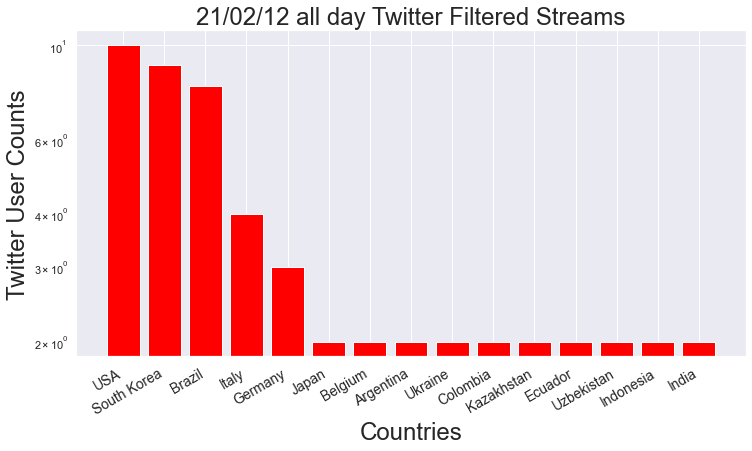

In [14]:
top_count_bar_chart(list(df["country"].value_counts().keys()[:15]), list(df["country"].value_counts().values[:15]), 'red', 
                "21/02/12 all day Twitter Filtered Streams")

In [15]:
dfg = df.groupby(['country'])['language'].count().sort_values(ascending=True).reset_index()
dfg

,country,language
0,Bangladesh,1
1,Turkey,1
2,Morocco,1
3,Mexico,1
4,France,1
5,Argentina,2
6,Kazakhstan,2
7,Japan,2
8,Ukraine,2
9,Indonesia,2


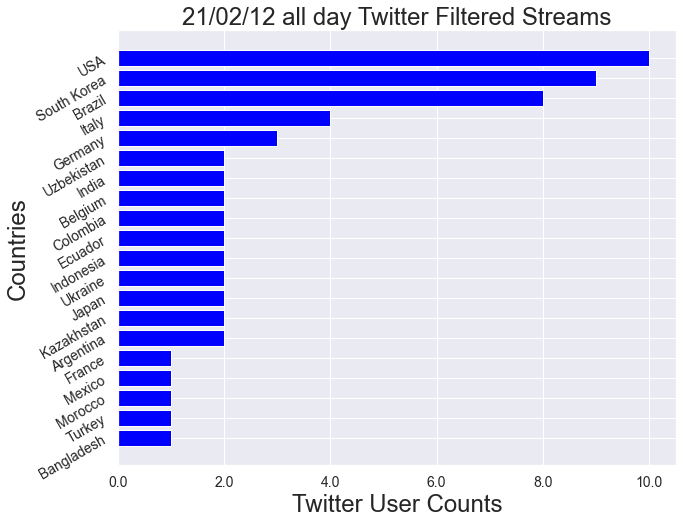

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax.barh(list(dfg.country), list(dfg.language), color='blue')
ax.set_title('21/02/12 all day Twitter Filtered Streams', size=24)
ax.set_xticklabels(ax.get_xticks(), size = 14)
ax.set_xlabel('Twitter User Counts', size=24)
ax.set_ylabel('Countries', size=24)
ax.set_yticklabels(dfg.country, fontsize=14, rotation=30, ha='right')
plt.show()

In [17]:
df.groupby(['country'])['language'].value_counts()

country      language
Argentina    es           2
Bangladesh   en           1
Belgium      en           1
             und          1
Brazil       pt           4
             und          3
             en           1
Colombia     es           2
Ecuador      es           2
France       fr           1
Germany      de           2
             en           1
India        en           2
Indonesia    en           1
             in           1
Italy        en           2
             it           2
Japan        ja           2
Kazakhstan   en           2
Mexico       en           1
Morocco      en           1
South Korea  ko           9
Turkey       tr           1
USA          en          10
Ukraine      ru           1
             uk           1
Uzbekistan   en           2
Name: language, dtype: int64

In [18]:
df.groupby(['country'])['language'].value_counts().keys()

MultiIndex([(  'Argentina',  'es'),
            ( 'Bangladesh',  'en'),
            (    'Belgium',  'en'),
            (    'Belgium', 'und'),
            (     'Brazil',  'pt'),
            (     'Brazil', 'und'),
            (     'Brazil',  'en'),
            (   'Colombia',  'es'),
            (    'Ecuador',  'es'),
            (     'France',  'fr'),
            (    'Germany',  'de'),
            (    'Germany',  'en'),
            (      'India',  'en'),
            (  'Indonesia',  'en'),
            (  'Indonesia',  'in'),
            (      'Italy',  'en'),
            (      'Italy',  'it'),
            (      'Japan',  'ja'),
            ( 'Kazakhstan',  'en'),
            (     'Mexico',  'en'),
            (    'Morocco',  'en'),
            ('South Korea',  'ko'),
            (     'Turkey',  'tr'),
            (        'USA',  'en'),
            (    'Ukraine',  'ru'),
            (    'Ukraine',  'uk'),
            ( 'Uzbekistan',  'en')],
           names=['country'

In [19]:
print(df.groupby(['country'])['language'].value_counts().keys()[0])
print(df.groupby(['country'])['language'].value_counts().keys()[0][0])
print(df.groupby(['country'])['language'].value_counts().keys()[0][1])

('Argentina', 'es')
Argentina
es


In [20]:
count_lan = defaultdict(list)
for i in df.groupby(['country'])['language'].value_counts().keys():
    count_lan[i[0]].append(i[1])
count_lan

defaultdict(list,
            {'Argentina': ['es'],
             'Bangladesh': ['en'],
             'Belgium': ['en', 'und'],
             'Brazil': ['pt', 'und', 'en'],
             'Colombia': ['es'],
             'Ecuador': ['es'],
             'France': ['fr'],
             'Germany': ['de', 'en'],
             'India': ['en'],
             'Indonesia': ['en', 'in'],
             'Italy': ['en', 'it'],
             'Japan': ['ja'],
             'Kazakhstan': ['en'],
             'Mexico': ['en'],
             'Morocco': ['en'],
             'South Korea': ['ko'],
             'Turkey': ['tr'],
             'USA': ['en'],
             'Ukraine': ['ru', 'uk'],
             'Uzbekistan': ['en']})

In [21]:
print(count_lan['Argentina'])
print(count_lan['Belgium'])
print(count_lan['Brazil'])

['es']
['en', 'und']
['pt', 'und', 'en']


In [22]:
print(count_lan.keys())
print(count_lan.values())

dict_keys(['Argentina', 'Bangladesh', 'Belgium', 'Brazil', 'Colombia', 'Ecuador', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Kazakhstan', 'Mexico', 'Morocco', 'South Korea', 'Turkey', 'USA', 'Ukraine', 'Uzbekistan'])
dict_values([['es'], ['en'], ['en', 'und'], ['pt', 'und', 'en'], ['es'], ['es'], ['fr'], ['de', 'en'], ['en'], ['en', 'in'], ['en', 'it'], ['ja'], ['en'], ['en'], ['en'], ['ko'], ['tr'], ['en'], ['ru', 'uk'], ['en']])


In [23]:
count_lantype = dict()
for i in count_lan:
    count_lantype[i] = np.size(count_lan[i])
count_lantype

{'Argentina': 1,
 'Bangladesh': 1,
 'Belgium': 2,
 'Brazil': 3,
 'Colombia': 1,
 'Ecuador': 1,
 'France': 1,
 'Germany': 2,
 'India': 1,
 'Indonesia': 2,
 'Italy': 2,
 'Japan': 1,
 'Kazakhstan': 1,
 'Mexico': 1,
 'Morocco': 1,
 'South Korea': 1,
 'Turkey': 1,
 'USA': 1,
 'Ukraine': 2,
 'Uzbekistan': 1}

#### for debugging purpose: you can uncomment/comment lines below

In [24]:
#count_lantype.pop(0)
#count_lantype.pop(1)
#count_lantype

In [25]:
#sorted_count_lantype = sorted(count_lantype, key=count_lantype.get, reverse=True)
sorted_count_lantype = {k: v for k, v in sorted(count_lantype.items(), key=lambda x:x[1], reverse=False)}
sorted_count_lantype

{'Argentina': 1,
 'Bangladesh': 1,
 'Colombia': 1,
 'Ecuador': 1,
 'France': 1,
 'India': 1,
 'Japan': 1,
 'Kazakhstan': 1,
 'Mexico': 1,
 'Morocco': 1,
 'South Korea': 1,
 'Turkey': 1,
 'USA': 1,
 'Uzbekistan': 1,
 'Belgium': 2,
 'Germany': 2,
 'Indonesia': 2,
 'Italy': 2,
 'Ukraine': 2,
 'Brazil': 3}

In [26]:
print(sorted_count_lantype.keys())
print(sorted_count_lantype.values())

dict_keys(['Argentina', 'Bangladesh', 'Colombia', 'Ecuador', 'France', 'India', 'Japan', 'Kazakhstan', 'Mexico', 'Morocco', 'South Korea', 'Turkey', 'USA', 'Uzbekistan', 'Belgium', 'Germany', 'Indonesia', 'Italy', 'Ukraine', 'Brazil'])
dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3])


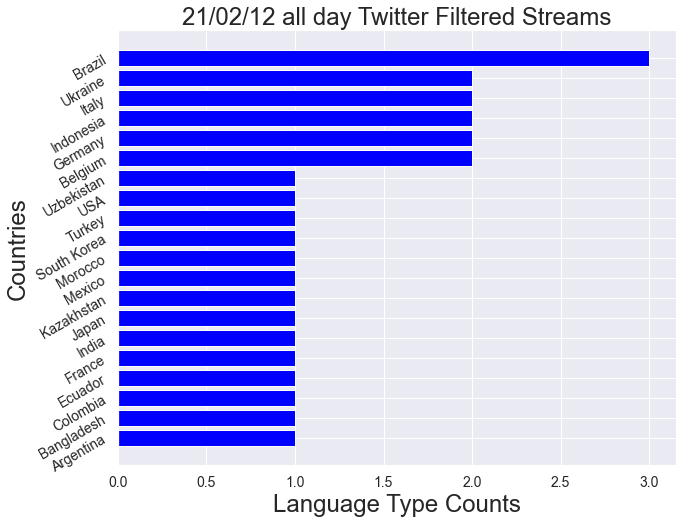

In [27]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax.barh(list(sorted_count_lantype.keys()), list(sorted_count_lantype.values()), color='blue')
ax.set_title('21/02/12 all day Twitter Filtered Streams', size=24)
ax.set_xticklabels(ax.get_xticks(), size = 14)
ax.set_xlabel('Language Type Counts', size=24)
ax.set_ylabel('Countries', size=24)
ax.set_yticklabels(list(sorted_count_lantype.keys()), fontsize=14, rotation=30, ha='right')
plt.show()

In [28]:
count_lan

defaultdict(list,
            {'Argentina': ['es'],
             'Bangladesh': ['en'],
             'Belgium': ['en', 'und'],
             'Brazil': ['pt', 'und', 'en'],
             'Colombia': ['es'],
             'Ecuador': ['es'],
             'France': ['fr'],
             'Germany': ['de', 'en'],
             'India': ['en'],
             'Indonesia': ['en', 'in'],
             'Italy': ['en', 'it'],
             'Japan': ['ja'],
             'Kazakhstan': ['en'],
             'Mexico': ['en'],
             'Morocco': ['en'],
             'South Korea': ['ko'],
             'Turkey': ['tr'],
             'USA': ['en'],
             'Ukraine': ['ru', 'uk'],
             'Uzbekistan': ['en']})

In [29]:
dict_geolang = dict()
dict_geoList = []
dict_lanList = []
for i in count_lan:
    for j in count_lan[i]:
        dict_geolang.setdefault(i, []).append(j)
        dict_geoList.append(i)
        dict_lanList.append(j)
print(dict_geolang)
print(dict_geoList)
print(dict_lanList)

{'Argentina': ['es'], 'Bangladesh': ['en'], 'Belgium': ['en', 'und'], 'Brazil': ['pt', 'und', 'en'], 'Colombia': ['es'], 'Ecuador': ['es'], 'France': ['fr'], 'Germany': ['de', 'en'], 'India': ['en'], 'Indonesia': ['en', 'in'], 'Italy': ['en', 'it'], 'Japan': ['ja'], 'Kazakhstan': ['en'], 'Mexico': ['en'], 'Morocco': ['en'], 'South Korea': ['ko'], 'Turkey': ['tr'], 'USA': ['en'], 'Ukraine': ['ru', 'uk'], 'Uzbekistan': ['en']}
['Argentina', 'Bangladesh', 'Belgium', 'Belgium', 'Brazil', 'Brazil', 'Brazil', 'Colombia', 'Ecuador', 'France', 'Germany', 'Germany', 'India', 'Indonesia', 'Indonesia', 'Italy', 'Italy', 'Japan', 'Kazakhstan', 'Mexico', 'Morocco', 'South Korea', 'Turkey', 'USA', 'Ukraine', 'Ukraine', 'Uzbekistan']
['es', 'en', 'en', 'und', 'pt', 'und', 'en', 'es', 'es', 'fr', 'de', 'en', 'en', 'en', 'in', 'en', 'it', 'ja', 'en', 'en', 'en', 'ko', 'tr', 'en', 'ru', 'uk', 'en']


In [30]:
data = {'Country': dict_geoList,'Language': dict_lanList}

In [31]:
data2 = {'Country': list(dict_geolang.keys()),'Language': list(dict_geolang.values())}

In [32]:
df2 = pd.DataFrame(data, columns = ['Country','Language']).set_index('Country')
df2

,Language
Country,
Argentina,es
Bangladesh,en
Belgium,en
Belgium,und
Brazil,pt
Brazil,und
Brazil,en
Colombia,es
Ecuador,es


In [33]:
df5 = pd.DataFrame(data2, columns = ['Country','Language'])
df5

,Country,Language
0,Argentina,[es]
1,Bangladesh,[en]
2,Belgium,"[en, und]"
3,Brazil,"[pt, und, en]"
4,Colombia,[es]
5,Ecuador,[es]
6,France,[fr]
7,Germany,"[de, en]"
8,India,[en]
9,Indonesia,"[en, in]"


In [34]:
langtypes_list = []
for i in df5['Language']:
    for j in i:
        langtypes_list.append(j)
print(set(langtypes_list))

{'uk', 'und', 'de', 'tr', 'pt', 'en', 'es', 'in', 'ja', 'fr', 'ru', 'it', 'ko'}


In [35]:
df6 = df5.copy()
for i in set(langtypes_list):
    df6[i] = np.zeros(shape=df6.shape[0])
df6.columns

Index(['Country', 'Language', 'uk', 'und', 'de', 'tr', 'pt', 'en', 'es', 'in',
       'ja', 'fr', 'ru', 'it', 'ko'],
      dtype='object')

In [36]:
df6

,Country,Language,uk,und,de,tr,pt,en,es,in,ja,fr,ru,it,ko
0,Argentina,[es],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bangladesh,[en],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Belgium,"[en, und]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,"[pt, und, en]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Colombia,[es],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Ecuador,[es],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,France,[fr],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Germany,"[de, en]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,India,[en],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Indonesia,"[en, in]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
for idx, row in df6.iterrows():
    if row['Language']:
        for i in row['Language']:
            df6.loc[idx, i] = 1
df6

,Country,Language,uk,und,de,tr,pt,en,es,in,ja,fr,ru,it,ko
0,Argentina,[es],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bangladesh,[en],0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Belgium,"[en, und]",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,"[pt, und, en]",0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Colombia,[es],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Ecuador,[es],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,France,[fr],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,Germany,"[de, en]",0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,India,[en],0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Indonesia,"[en, in]",0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df6.drop(['Language'], axis=1, inplace=True)
df6.set_index('Country', inplace=True)
df6

,uk,und,de,tr,pt,en,es,in,ja,fr,ru,it,ko
Country,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Colombia,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ecuador,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Germany,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


https://indianaiproduction.com/seaborn-heatmap/

https://stackoverflow.com/questions/34706845/change-xticklabels-fontsize-of-seaborn-heatmap

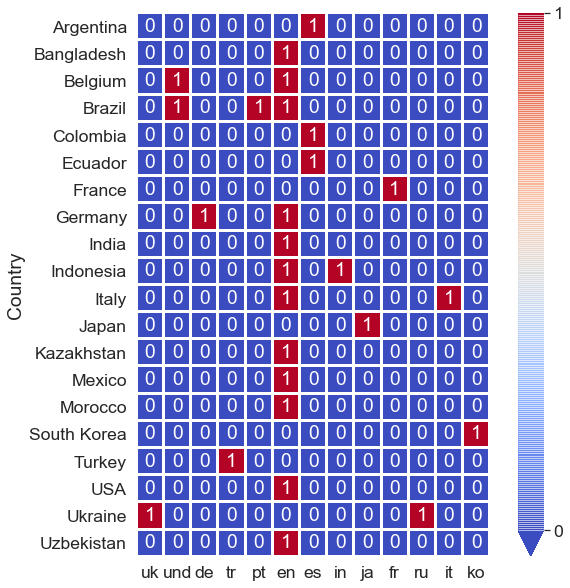

In [39]:
sns.set(font_scale=1.6)
plt.figure(figsize=(10,10))
cbar_kws = {"orientation":"vertical", 
            "shrink":1.,
            'extend':'min', 
            'extendfrac':0.05, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(df6, cmap='coolwarm', center=0.5, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)

In [40]:
df3 = pd.read_csv("./data2/ana2_BTS_geoOnly_210212_allday_CDT.csv",index_col='index')
df3.head()

,date,hour,language,retweets,min,place,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,
1,2021-02-12,6,en,0,9,[Uzbekistan],Uzbekistan,0,0,0,39,2021-02-12T06:09:39.000-06:00,You are my reason to smile🌌💜\n#JHOPEPlazaClaro...
2,2021-02-12,6,ko,0,11,"[Pyeongtaek-si, Republic of Korea]",South Korea,0,0,0,48,2021-02-12T06:11:48.000-06:00,위로받고 싶을 때 들어보세요 영탁이불\n\n#영탁 #youngtak #영탁이불 #영...
3,2021-02-12,6,en,0,12,[Uzbekistan],Uzbekistan,0,0,0,44,2021-02-12T06:12:44.000-06:00,"When the night is dark, all I can see is your ..."
4,2021-02-12,6,ja,0,20,"[Sapporo-shi Toyohira-ku, Hokkaidō]",Japan,0,0,0,33,2021-02-12T06:20:33.000-06:00,パセオ札幌でBTSのPOPUP SHOPやってんだけど、、今は混んでなくて、ゆっくり店内のグ...
5,2021-02-12,6,en,0,32,[Kazakhstan],Kazakhstan,0,0,0,30,2021-02-12T06:32:30.000-06:00,Hi Engenes!🤗\nPlease watch my #ENHYPEN - #10Mo...


In [41]:
df3p = df3.drop(['date','hour','retweets','min','place','replies','likes','quotes','sec','time','tweet'],axis=1)
df3p.dropna(axis=0, how='any', inplace=True)
df3p

,language,country
index,,
1,en,Uzbekistan
2,ko,South Korea
3,en,Uzbekistan
4,ja,Japan
5,en,Kazakhstan
8,ko,South Korea
10,en,Bangladesh
11,ko,South Korea
12,en,Kazakhstan


In [42]:
langs_list = []
for i in df3p['language']:
    langs_list.append(i)
print(set(langs_list))

{'und', 'de', 'tr', 'pt', 'ja', 'en', 'in', 'es', 'it', 'fr', 'ru', 'uk', 'ko'}


In [43]:
df4 = df3p.copy()
for i in set(langs_list):
    df4[i] = np.zeros(shape=df4.shape[0])
df4.columns

Index(['language', 'country', 'und', 'de', 'tr', 'pt', 'ja', 'en', 'in', 'es',
       'it', 'fr', 'ru', 'uk', 'ko'],
      dtype='object')

In [44]:
for idx, row in df4.iterrows():
    if row['language']:
        df4.loc[idx, row['language']] = 1
df4

,language,country,und,de,tr,pt,ja,en,in,es,it,fr,ru,uk,ko
index,,,,,,,,,,,,,,,
1,en,Uzbekistan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ko,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,en,Uzbekistan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ja,Japan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,en,Kazakhstan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ko,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,en,Bangladesh,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,ko,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,en,Kazakhstan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df4.drop(['language'], axis=1, inplace=True)
df4

,country,und,de,tr,pt,ja,en,in,es,it,fr,ru,uk,ko
index,,,,,,,,,,,,,,
1,Uzbekistan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Uzbekistan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Japan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Kazakhstan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,Bangladesh,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,Kazakhstan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df4.set_index('country', inplace=True)
df4

,und,de,tr,pt,ja,en,in,es,it,fr,ru,uk,ko
country,,,,,,,,,,,,,
Uzbekistan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Uzbekistan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Japan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kazakhstan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Kazakhstan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#dfgp = df.groupby(['country'])
#for name, group in dfgp:
#    print(name, ' ', group['language'])
#    print('--------------------------------')

In [ ]:
#loc_lan = defaultdict(list)
#for name, group in dfgp:
#    for i in group['language']:
#        loc_lan[name].append(group['language'])
#loc_lan